# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.zip')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Ваш код здесь
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [27]:
# Ваш код здесь

data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


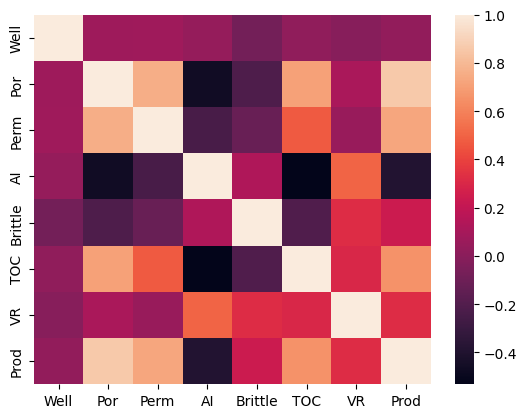

In [37]:
sns.heatmap(data.corr());

In [36]:
matrix = np.matrix(data)
#matrix = np.column_stack((np.ones(matrix.shape[0]), matrix))
matrix_cent = matrix - matrix.mean()
matrix_st = matrix_cent / np.linalg.norm(matrix_cent, axis=0)
corr_matrix = matrix_st.T@matrix_st
corr_matrix

matrix([[ 1.        ,  0.99225223,  0.99224559,  0.99222499,  0.991574  ,
          0.99222231,  0.99221963, -0.95853784],
        [ 0.99225223,  1.        ,  0.99999325,  0.99998219,  0.99957466,
          0.9999882 ,  0.99998543, -0.96570331],
        [ 0.99224559,  0.99999325,  1.        ,  0.99999391,  0.99960664,
          0.99999607,  0.99999512, -0.96633122],
        [ 0.99222499,  0.99998219,  0.99999391,  1.        ,  0.99962508,
          0.99999865,  0.99999961, -0.96701247],
        [ 0.991574  ,  0.99957466,  0.99960664,  0.99962508,  1.        ,
          0.99961662,  0.99962659, -0.96488316],
        [ 0.99222231,  0.9999882 ,  0.99999607,  0.99999865,  0.99961662,
          1.        ,  0.99999963, -0.9667682 ],
        [ 0.99221963,  0.99998543,  0.99999512,  0.99999961,  0.99962659,
          0.99999963,  1.        , -0.96686744],
        [-0.95853784, -0.96570331, -0.96633122, -0.96701247, -0.96488316,
         -0.9667682 , -0.96686744,  1.        ]])

> *Ваши выводы здесь*

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [6]:
# Ваш код здесь

X = np.column_stack((np.ones(200), data.drop('Prod', axis=1)))
y = data[['Prod']]
w_hat = np.linalg.inv(X.T@X)@X.T@y
print('w_0',w_hat.values[0])
print('w_well',w_hat.values[1])
print('w_por',w_hat.values[2])
print('w_per',w_hat.values[3])
print('w_pvr',w_hat.values[7])
w_hat

w_0 [-1232.30802956]
w_well [0.05070036]
w_por [230.17914038]
w_per [116.23900607]
w_pvr [785.25981457]


,Prod
0,-1232.308030
1,0.050700
2,230.179140
3,116.239006
4,-365.202301
5,24.994370
6,-78.400929
7,785.259815


In [7]:
X_1 = data.drop('Prod', axis=1)
w_hat_1 = np.linalg.inv(X_1.T@X_1)@X_1.T@y
w_hat_1

,Prod
0,-0.043450
1,184.616889
2,157.557782
3,-675.731071
4,19.527421
5,-272.983826
6,1124.705458


> *Ваши выводы здесь*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [8]:
# Ваш код здесь
Prod_new = w_hat.iloc[0]+w_hat.iloc[1]*106+w_hat.iloc[2]*15.32+w_hat.iloc[3]*3.71+w_hat.iloc[4]*3.29+w_hat.iloc[5]*55.99+w_hat.iloc[6]*1.35+w_hat.iloc[7]*2.42
print(f'Разница в абсолютных значениях: {(round(4748 - Prod_new))}')

from sklearn.metrics import mean_absolute_percentage_error

y_pred = []
for i in range(X.shape[0]):
    y_pred.append(np.sum(X[i]*w_hat.T, axis=1))
y_pred = np.array(y_pred)
print('MAPE y_2 score: {:.1f} %'.format(mean_absolute_percentage_error(y, y_pred) * 100))

Разница в абсолютных значениях: Prod    25.0
dtype: float64
MAPE y_2 score: 3.6 %


In [9]:
# Ваш код здесь
Prod_new = w_hat_1.iloc[0]*106+w_hat_1.iloc[1]*15.32+w_hat_1.iloc[2]*3.71+w_hat_1.iloc[3]*3.29+w_hat_1.iloc[4]*55.99+w_hat_1.iloc[5]*1.35+w_hat_1.iloc[6]*2.42
print(f'Разница в абсолютных значениях: {(round(4748 - Prod_new))}')

from sklearn.metrics import mean_absolute_percentage_error

y_pred_1 = []
for i in range(X_1.shape[0]):
    y_pred_1.append(np.sum(X_1.values[i]*w_hat_1.T, axis=1))
y_pred_1 = np.array(y_pred_1)
print('MAPE y_2 score: {:.1f} %'.format(mean_absolute_percentage_error(y, y_pred_1) * 100))

Разница в абсолютных значениях: Prod    116.0
dtype: float64
MAPE y_2 score: 4.0 %


> *Ваши выводы здесь*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [10]:
# Ваш код здесь

display(data.corr())
w_hat[1:].T

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


,1,2,3,4,5,6,7
Prod,0.0507,230.17914,116.239006,-365.202301,24.99437,-78.400929,785.259815


> *Ваши выводы здесь*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_percentage_error

X_1 = np.column_stack((np.ones(200), data.drop(['Prod','Well','Perm','TOC'], axis=1)))
y_1 = data[['Prod']]
w_hat_1 = np.linalg.inv(X_1.T@X_1)@X_1.T@y_1
print('w_0',w_hat_1.values[0])
print('w_1',w_hat_1.values[1])
print('w_2',w_hat_1.values[2])
print('w_3',w_hat_1.values[3])
y_pred_1 = []
for i in range(X.shape[0]):
    y_pred_1.append(np.sum(X_1[i]*w_hat_1.T, axis=1))
y_pred_1 = np.array(y_pred_1)
print('MAPE y_2 score: {:.1f} %'.format(mean_absolute_percentage_error(y, y_pred_1) * 100))


w_0 [-1835.44646069]
w_1 [293.03624565]
w_2 [-200.03091206]
w_3 [27.64098209]
MAPE y_2 score: 4.0 %


In [12]:
print(data.drop(['Well','Perm','TOC'], axis=1).corr())
w_hat_1[1:].T

              Por        AI   Brittle        VR      Prod
Por      1.000000 -0.461549 -0.218570  0.111860  0.861910
AI      -0.461549  1.000000  0.127599  0.499143 -0.390835
Brittle -0.218570  0.127599  1.000000  0.317929  0.237155
VR       0.111860  0.499143  0.317929  1.000000  0.323182
Prod     0.861910 -0.390835  0.237155  0.323182  1.000000


,1,2,3,4
Prod,293.036246,-200.030912,27.640982,517.402726


> *Ваши выводы здесь*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [17]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

LR = LinearRegression()
LR.fit(X, y)
print(LR.coef_)
w_hat_1[1:].T

[ 293.03624565 -200.03091206   27.64098209  517.40272597]


,1,2,3,4
Prod,293.036246,-200.030912,27.640982,517.402726


> *Ваши выводы здесь*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [80]:
# Ваш код здесь
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('unconv.zip')

X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print(f'X_poly.shape -> {X_poly.shape}')

LR.fit(X_poly, y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(LR, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
LR_train = round(-cv_results['train_score'].mean() * 100, 3)
LR_test = round(-cv_results['test_score'].mean() * 100, 3)

print('MAPE на тренировочных фолдах: {:.3f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.3f}'.format(-cv_results['test_score'].mean() * 100))

X_poly.shape -> (200, 34)
MAPE на тренировочных фолдах: 1.773
MAPE на валидационных фолдах: 2.681


> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [82]:
# Ваш код здесь
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param = {'alpha':[0.1, 0.2, 0.3, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 15, 20]}

lasso = Lasso()

grid_serach = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=lasso,
    param_grid=param,
    cv=5,
    n_jobs=-1
)

grid_serach.fit(X_poly, y)

print(grid_serach.best_params_)

lasso = Lasso(alpha=5)
lasso.fit(X_poly, y)

cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
lasso_train = round(-cv_results['train_score'].mean() * 100, 3)
lasso_test = round(-cv_results['test_score'].mean() * 100, 3)
print('MAPE на тренировочных фолдах: {:.3f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.3f}'.format(-cv_results['test_score'].mean() * 100))

{'alpha': 5}
MAPE на тренировочных фолдах: 1.828
MAPE на валидационных фолдах: 2.276


> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [83]:
# Ваш код здесь
from sklearn.linear_model import Ridge

param = {'alpha':[0.1, 0.2, 0.3, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 15, 20]}

ridge = Ridge()

grid_serach = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=ridge,
    param_grid=param,
    cv=5,
    n_jobs=-1
)

grid_serach.fit(X_poly, y)

print(grid_serach.best_params_)

ridge = Ridge(alpha=0.2)
ridge.fit(X_poly, y)

cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
ridge_train = round(-cv_results['train_score'].mean() * 100, 3)
ridge_test = round(-cv_results['test_score'].mean() * 100, 3)
print('MAPE на тренировочных фолдах: {:.3f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.3f}'.format(-cv_results['test_score'].mean() * 100))

{'alpha': 0.2}
MAPE на тренировочных фолдах: 1.774
MAPE на валидационных фолдах: 2.672


> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [84]:
# Ваш код здесь
from sklearn.linear_model import ElasticNet

param = {'alpha':[0.01, 0.05, 0.1, 0.2, 0.3, 1, 1.5, 2, 3, 4, 5],
         'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

e_net = ElasticNet()

grid_serach = GridSearchCV(
    scoring='neg_mean_absolute_percentage_error',
    estimator=e_net,
    param_grid=param,
    cv=5,
    n_jobs=-1
)

grid_serach.fit(X_poly, y)

print(grid_serach.best_params_)

e_net = ElasticNet(alpha=5, l1_ratio=1)
ridge.fit(X_poly, y)

cv_results = cross_validate(e_net, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
e_net_train = round(-cv_results['train_score'].mean() * 100, 3)
e_net_test = round(-cv_results['test_score'].mean() * 100, 3)
print('MAPE на тренировочных фолдах: {:.3f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.3f}'.format(-cv_results['test_score'].mean() * 100))

{'alpha': 5, 'l1_ratio': 1}
MAPE на тренировочных фолдах: 1.828
MAPE на валидационных фолдах: 2.276


> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [85]:
pd.DataFrame({'Model':[LR, lasso, ridge, e_net],
              'Params':['', str(lasso)[5:], str(ridge)[5:], str(e_net)[10:]],
              'Poly':[True, True, True, True],
              'Train':[LR_train, lasso_train, ridge_train, e_net_train],
              'Test':[LR_test, lasso_test, ridge_test, e_net_test]})

,Model,Params,Poly,Train,Test
0,LinearRegression(),,True,1.773,2.681
1,Lasso(alpha=5),(alpha=5),True,1.828,2.276
2,Ridge(alpha=0.2),(alpha=0.2),True,1.774,2.672
3,"ElasticNet(alpha=5, l1_ratio=1)","(alpha=5, l1_ratio=1)",True,1.828,2.276


In [86]:
pd.DataFrame({'Model':['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet'],
              'Params':['', 'alpha=5', 'alpha=0.2', 'alpha=5, l1_ratio=1'],
              'Poly':[True, True, True, True],
              'Train':[1.773, 1.828, 1.774, 1.828],
              'Test':[2.681, 2.276, 2.672, 2.276]})

,Model,Params,Poly,Train,Test
0,LinearRegression,,True,1.773,2.681
1,Lasso,alpha=5,True,1.828,2.276
2,Ridge,alpha=0.2,True,1.774,2.672
3,ElasticNet,"alpha=5, l1_ratio=1",True,1.828,2.276
